# **CLICKBAIT CLASSIFIER**
***

[Dataset](https://www.kaggle.com/datasets/amananandrai/clickbait-dataset?select=clickbait_data.csv)

In [31]:
import keras.layers
import numpy as np
import pandas as pd
import matplotlib as plt

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Embedding, GlobalAvgPool1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.backend import clear_session

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from numpy import asarray

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import contractions


from collections import Counter
from importlib import reload
import time
import re
import random
import string
from string import punctuation

#local files
import df_info
import grapher
import process_new



In [2]:
# load data into dataframe
file_path = 'Datasets\\clickbait_data.csv'
content = pd.read_csv(file_path)
df = pd.DataFrame(content)
df = df.rename(columns={'clickbait': 'label'})
df

,headline,label
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [3]:
# check for missing entries
df.headline.isna().sum()

0

In [4]:
len(df)

32000

In [5]:
# see df split
df0, df1 = df_info.split_data(df, 'label')
df0.shape[0], df1.shape[0]

(16001, 15999)

## **PRE-PROCESSING**
- convert to lowercase
- expand contractions (handle exceptions)
- remove punctuation (keep hyphens)
- remove stop words *(optional)*
- adjust spacing as needed

In [6]:
reload(df_info)
cleaned_data = df_info.clean_data(df)
cleaned_clickbait = df_info.clean_data(df0)
cleaned_non_clickbait = df_info.clean_data(df1)

In [7]:
# test_sample = [cleaned[68], cleaned[25078], cleaned[25066], cleaned[65], cleaned[87]]
# test_sample_indices = [68, 25078, 25066, 65, 87]
# # cleaned

In [8]:
cleaned_data

0                                                get bings
1                            tv female friend group belong
2          new star wars force awakens trailer give chills
3        vine new york celebrity big brother fucking pe...
4        couple stunning photo shoot baby learning inop...
                               ...                        
31995           make female hearts flutter iraq throw shoe
31996    british liberal democrat patsy calton 56 dies ...
31997    drone smartphone app help heart attack victims...
31998    netanyahu urges pope benedict israel denounce ...
31999    computer makers prepare stake bigger claim phones
Name: headline, Length: 32000, dtype: object

In [9]:
cleaned_data.isna().sum()

0

In [10]:
df.headline = cleaned_data
df

,headline,label
0,get bings,1
1,tv female friend group belong,1
2,new star wars force awakens trailer give chills,1
3,vine new york celebrity big brother fucking pe...,1
4,couple stunning photo shoot baby learning inop...,1
...,...,...
31995,make female hearts flutter iraq throw shoe,0
31996,british liberal democrat patsy calton 56 dies ...,0
31997,drone smartphone app help heart attack victims...,0
31998,netanyahu urges pope benedict israel denounce ...,0


## Splitting the Dataset
- split cleaned data into thirds
- tokenize data
- get vocab_size
- pad sequences

In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(cleaned_data)
# counts = DataFrame(list(vectorizer.vocabulary_.items()))
# counts

CountVectorizer()

In [12]:
y = df.label.astype(np.float32)
headlines_tr, headlines_te, y_tr, y_te = train_test_split(cleaned_data, y, test_size=0.3, random_state=3)

In [13]:
vectorizer = CountVectorizer()
vectorizer.fit(headlines_tr)
X_tr = vectorizer.transform(headlines_tr)
X_te = vectorizer.transform(headlines_te)
X_tr

<22400x19233 sparse matrix of type '<class 'numpy.int64'>'
	with 139529 stored elements in Compressed Sparse Row format>

In [14]:
classifier = LogisticRegression()
classifier.fit(X_tr, y_tr)
score = classifier.score(X_te, y_te)
print("Accuracy:", score)

X_tr = X_tr.toarray()
X_te = X_te.toarray()

Accuracy: 0.9509375


In [15]:
# get word counts from df0, df1
# reload(df_info)
#
# counts = df_info.bow(pd.DataFrame(cleaned_data))
# counts_cb = df_info.bow(pd.DataFrame(cleaned_clickbait))
# counts_ncb = df_info.bow(pd.DataFrame(cleaned_non_clickbait))

In [16]:
# counts.most_common()

In [17]:
# cdf = pd.DataFrame.from_dict(counts, orient='index').reset_index(inplace=False)
# cdf = cdf.sort_values(by=[0], ascending=False)[:10]
# cdf = cdf[['index', 0]]
# cdf = cdf.reset_index(inplace=False)
# cdf

In [18]:
# reload(df_info)
# df_info.frequency_histogram(cdf, 'Most Common Words')

In [19]:
# cb = df_info.counter_to_df(counts_cb)
# ncb = df_info.counter_to_df(counts_ncb)
# df_info.frequency_histogram(cb, 'Most Common Clickbait Words')
# df_info.frequency_histogram(ncb, 'Most Common Non-Clickbait Words')

## Building & Training the Model

In [20]:
input_dim = X_tr.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                192340    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 192,351
Trainable params: 192,351
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
88/88 [==============================] - 2s 21ms/step - loss: 0.2063 - accuracy: 0.9745 - val_loss: 0.1987 - val_accuracy: 0.9589
Epoch 2/20
88/88 [==============================] - 2s 20ms/step - loss: 0.1401 - accuracy: 0.9799 - val_loss: 0.1598 - val_accuracy: 0.9601
Epoch 3/20
88/88 [==============================] - 2s 20ms/step - loss: 0.1036 - accuracy: 0.9836 - val_loss: 0.1389 - val_accuracy: 0.9605
Epoch 4/20
88/88 [==============================] - 2s 20ms/step - loss: 0.0809 - accuracy: 0.9874 - val_loss: 0.1266 - val_accuracy: 0.9613
Epoch 5/20
88/88 [==============================] - 2s 21ms/step - loss: 0.0652 - accuracy: 0.9901 - val_loss: 0.1189 - val_accuracy: 0.9614
Epoch 6/20
88/88 [==============================] - 2s 20ms/step - loss: 0.0539 - accuracy: 0.9921 - val_loss: 0.1139 - val_accuracy: 0.9598
Epoch 7/20
88/88 [==============================] - 2s 21ms/step - loss: 0.0452 - accuracy: 0.9937 - val_loss: 0.1109 - val_accuracy: 0.9599
Epoch 8/20
88

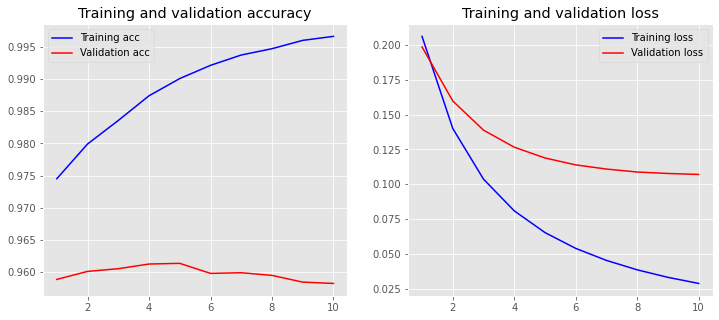

In [24]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=5)

history = model.fit(X_tr, y_tr,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_te, y_te),
                    batch_size=256,
                    callbacks=callback)
grapher.plot_history(history)

In [22]:
loss, accuracy = model.evaluate(X_tr, y_tr, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))

700/700 [==============================] - 2s 3ms/step - loss: 0.2495 - accuracy: 0.9761
Training Accuracy: 0.9761


In [23]:
loss, accuracy = model.evaluate(X_te, y_te, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

300/300 [==============================] - 1s 2ms/step - loss: 0.2791 - accuracy: 0.9560
Testing Accuracy:  0.9560


In [55]:
model.save('Saved Models\\trained_1')

INFO:tensorflow:Assets written to: Saved Models\trained_1\assets


In [56]:
trained_model = keras.models.load_model('Saved Models\\trained_1')

In [70]:

from_user: str = input('Input a title to be predicted:\n')
dataframe = DataFrame()
dataframe['headline'] = [from_user]
dataframe = df_info.clean_data(dataframe)
dataframe
# model.predict()



0    25 things know shrek
Name: headline, dtype: object

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)